### Reidmen Arostica
* Mathematical Engineering Student at DIM (FCFM, Universidad de Chile)
* Currently doing the Undergraduate Thesis supervised Axel Osses.
* Main interests: Numerical Simulations of PDE's, HPC and Machine Learning

<p align="center">
    <img align="left" src="img/DockerLogo.png" width="300"/> <img align="center" src="img/FenicsLogo.png" width="400"/>
</p>

## Why virtualization using Docker?

<p align="left">
    <ul>
        <li> Portable deployment of applications as a single object. </li>
        <li> Application-centric paradigm. </li>
        <li> Reusable components. </li>
        <li> Public registry for sharing containers.</li>
        <li> A Growing Ecosystem since their release, 2014. </li>
     </ul>
</p>

<p>
    <img align="left" src="img/DockerArxivFile.png" width="400"/> <img align="center" src="img/DockerArchitecture.png" width="400"/> 
</p>

## Why use FEniCS?
* An open-source software (C++, Python) with specialized libraries for numerical computation.
* Allows ``automatic`` solution of partial differential equations using the FEM theory.
* It contains libraries such as UFL, FIAT, FFC, DOLFIN, etc.

### Repositories:
* **https://fenicsproject.org/**
* **https://github.com/FEniCS**
* **https://bitbucket.org/fenics-project/dolfin**

## Why Jupyter?
* A new form of prototyping problem and present projects.
* On a interactive fashion.
* Lots of features, a combination of frameworks.
* Much more!...

## Goals

- Installation of hIPPYlib on the terminal
- Undestand FEniCS usage
- Solve the forward and adjoint Poisson equations
- Understand the inverse method framework
- Visualise results
- Modify the code!

## Tools

- Finite element method
- Derivation of gradient via the adjoint method
- Armijo line search

## Coefficient field inversion in an elliptic partial differential equation

We consider the estimation of a coefficient in an elliptic partial
differential equation (PDE) as a model problem. 
Depending of the interpretation, it defines:

* The inversion for groundwater flow or heat conductivity.  
* The seach of membrane with a certain spatially varying stiffness. 

Let $\Omega\subset\mathbb{R}^n$, $n\in\{1,2,3\}$ be an open, bounded
domain and consider the following problem:

$$
\min_{m} J(m):=\frac{1}{2}\int_\Omega (u-u_d)^2\, dx + \frac{\gamma}{2}\int_\Omega|\nabla m|^2\,dx,
$$

where $u$ is the solution of

$$
\begin{split}
\quad -\nabla\cdot(e^m \nabla u) &= f \text{ in }\Omega,\\
u &= 0 \text{ on }\partial\Omega.
\end{split}
$$

Here $m \in \mathcal{M}:=\{m\in L^{\infty}(\Omega) \bigcap H^1(\Omega)\}$ denotes the unknown coefficient field, 
$u \in H^1_0(\Omega)$ the state variable, $u_d$ the (possibly noisy) data, $f\in H^{-1}(\Omega)$ a given volume force, and $\gamma\ge 0$ the regularization parameter.






### The variational (or weak) form of the state equation:

Find $u\in \mathcal{V}$ such that 

$$(e^m \nabla u,\nabla v) - (f,v) = 0, \text{ for all } v\in \mathcal{V},$$

where $\mathcal{V} := H_0^1(\Omega)$ is the space of functions vanishing on $\partial\Omega$ with square integrable derivatives. 

Above, $(\cdot\,\cdot)$ denotes the $L^2$-inner product, i.e, for scalar functions $u,v$ defined on $\Omega$ we write 

$$(u,v) := \int_\Omega u(x) v(x) \,dx, $$

and similarly for vector functions $\boldsymbol{u}, \boldsymbol{v}$ defined on $\Omega$ we write

$$(\boldsymbol{u},\boldsymbol{v}) := \int_\Omega \boldsymbol{u}(x) \cdot \boldsymbol{v}(x) \,dx.$$


### Gradient evaluation:

The Lagrangian functional $\mathscr{L}:\mathcal{V}\times\mathcal{M}\times\mathcal{V}\rightarrow \mathbb{R}$ is given by

$$
\mathscr{L}(u,m,p):= \frac{1}{2}(u-u_d,u-u_d) +
\frac{\gamma}{2}(\nabla m, \nabla m) +  (e^m\nabla u,\nabla p) - (f,p).
$$

Then the gradient of the cost functional $\mathcal{J}(m)$ with respect to the parameter $m$ is

$$
    \mathcal{G}(m)(\tilde m) := \mathscr{L}_m(u,m,p)(\tilde{m}) = \gamma(\nabla m, \nabla \tilde{m}) +
     (\tilde{m}e^m\nabla u, \nabla p) \quad \forall \tilde{m} \in \mathcal{M},
$$

where $u \in H_0^1(\Omega)$ is the solution of the forward problem,

$$ \mathscr{L}_p(u,m,p)(\tilde{p})  := (\exp(m)\nabla u, \nabla \tilde{p}) - (f,\tilde{p}) = 0
\quad \forall \tilde{p} \in \mathcal{V}, $$

and $p \in H_0^1(\Omega)$ is the solution of the adjoint problem,

$$ \mathscr{L}_u(u,m,p)(\tilde{u}) := (\exp(m)\nabla p, \nabla \tilde{u}) + (u-u_d,\tilde{u}) = 0
\quad \forall \tilde{u} \in \mathcal{V}.$$


### Steepest descent method.

* The steepest descent methods computes an update direction $\hat{m}_k$ in the direction of the negative gradient defined as 

$$
(\hat{m}_k, \tilde{m} ) = -\mathcal{G}(m_k)(\tilde m) := -\mathscr{L}_{m}(u_k,m_k,p_k)(\tilde{m}) \quad \forall \tilde{m} \in H^1(\Omega),
$$

  where the evaluation of the gradient $\mathcal{G}(m_k)$ involve the solution $u_k$ and $p_k$ of the forward and adjoint problem (respectively) for $m = m_k$.

* Then its set the update $m_{k+1} = m_k + \alpha \hat{m}_k$, where the step length $\alpha$ is chosen to guarantee sufficient descent. 


### Dependencies

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# Dolfin --> FEniCS library and hPPYlib library
import dolfin as dl
from hippylib import nb

# The useful numpy package for numerical computation
import numpy as np
# logging just for debugging purposes
import logging

logging.getLogger('FFC').setLevel(logging.WARNING)
logging.getLogger('UFL').setLevel(logging.WARNING)

np.random.seed(seed=1)

### Model set up:

As in the introduction, the first thing we need to do is to set up the numerical model.

In this cell, we set the mesh ``mesh``, the finite element spaces ``Vm`` and ``Vu`` corresponding to the parameter space and state/adjoint space, respectively. In particular, we use linear finite elements for the parameter space, and quadratic elements for the state/adjoint space.

#### How powerfull is FEniCS to define meshes?

In [2]:
# Import mshr package
import mshr as mh
import math as mt
# Parameters
#R, r = 1.0, 0.3
#t = 10
#x, y, z = R*mt.cos(float(t)/180*mt.pi), 0, R*mt.sin((t+30)/180*mt.pi)
# Create the geometry
#sphere_big = mh.Sphere(dl.Point(0, 0, 0), R)
#sphere_small = mh.Sphere(dl.Point(x, y, z), r)
#center_box = mh.Box(dl.Point(-2, -2, -0.03), dl.Point(2, 2, 0.03))
#star = sphere_big - sphere_small - center_box

# Define mesh
#star_mesh = mh.generate_mesh(star, 16)

In [3]:
#from IPython.display import HTML
#HTML(dl.X3DOM().html(star_mesh))

The true parameter ``mtrue`` is the finite element interpolant of the function

$$ m_{\rm true} = \left\{ \begin{array}{l} \ln 4 \; \forall \,(x,y)  \in \, \mathbf{B}_{0.15}((0.3,0.3)) \cup \mathbf{B}_{0.15}((0.7,0.7)) \\ \ln 8 \; {\rm otherwise}. \end{array}\right. $$

The forcing term ``f`` and the boundary conditions ``u0`` for the forward problem are

$$ f = 1 \; \forall {\bf x} \in \Omega, \quad u = 0 \; \forall {\bf x} \in \partial \Omega. $$

In [4]:
# The FEniCS paradigm uses the definition of mesh
# and then the definition of Function Spaces for the weak formulations
# Create mesh and define function spaces
nx = 32
ny = 32
mesh = dl.UnitSquareMesh(nx, ny)
Vm = dl.FunctionSpace(mesh, 'Lagrange', 1)
Vu = dl.FunctionSpace(mesh, 'Lagrange', 2)

# The true and initial guess for inverted parameter
# defined using c++ expressions
cpp = 'std::log(8.-4.*(pow(x[0]-0.3,2) + pow(x[1]-0.3,2) < pow(0.15,2) || \
                       pow(x[0]-0.7,2) + pow(x[1]-0.7,2) < pow(0.15,2) ) )'
mtrue = dl.interpolate(dl.Expression(cpp, degree=2), Vm)

# Define function for state and adjoint
u = dl.Function(Vu)
m = dl.Function(Vm)
p = dl.Function(Vu)

# Define Trial and Test Functions
u_trial, m_trial, p_trial = dl.TrialFunction(Vu), dl.TrialFunction(Vm), dl.TrialFunction(Vu)
u_test,  m_test,  p_test  = dl.TestFunction(Vu),  dl.TestFunction(Vm),  dl.TestFunction(Vu)

# Initialize input functions
f  = dl.Constant(1.0)
u0 = dl.Constant(0.0)

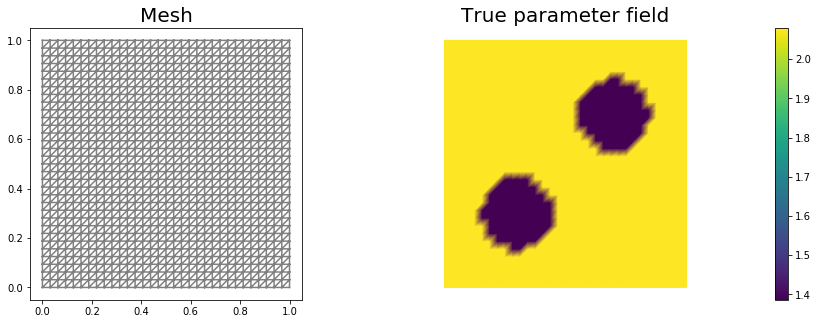

In [5]:
# Plot
plt.figure(figsize=(15,5))
nb.plot(mesh, subplot_loc=121, mytitle="Mesh", show_axis='on')
nb.plot(mtrue, subplot_loc=122, mytitle="True parameter field")
plt.show()

In [6]:
# Set up dirichlet boundary conditions
# They can be defined using Python subclasses, or by cpp code
cpp_bc = 'on_boundary'
bc_state = dl.DirichletBC(Vu, u0, cpp_bc)
bc_adj   = dl.DirichletBC(Vu, dl.Constant(0.), cpp_bc)

### Set up synthetic observations:

To generate the synthetic observation we first solve the PDE for the state variable ``utrue`` corresponding to the true parameter ``mtrue``.
Specifically, we solve the variational problem:

Find $u\in \mathcal{V}$ such that 

$$\underbrace{(e^{m_{\text true}} \nabla u,\nabla v)}_{\; := \; a_{\rm true}} - \underbrace{(f,v)}_{\; := \;L_{\rm true}} = 0, \text{ for all } v\in \mathcal{V}$$

Then we perturb the true state variable and write the observation ``ud`` as

$$ u_{d} = u_{\rm true} + \eta, \quad {\rm where} \; \eta \sim \mathcal{N}(0, \sigma^2).$$

Here the standard variation $\sigma$ is proportional to ``noise_level``.

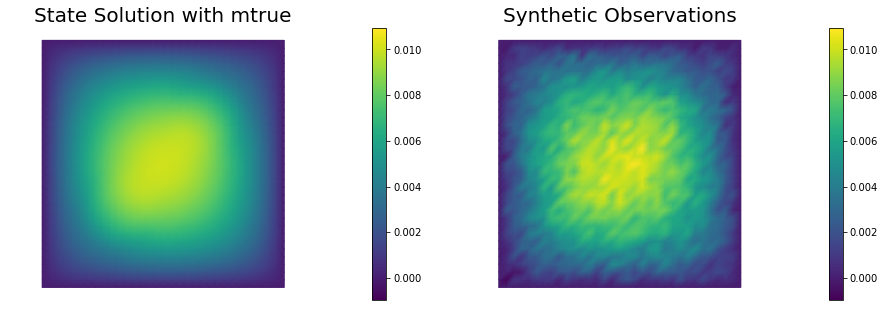

In [7]:
# Noise level, we fixed to 5%
noise_level = 0.05

# Weak form for setting up the synthetic observations
a_true = dl.inner( dl.exp(mtrue) * dl.grad(u_trial), dl.grad(u_test)) * dl.dx
L_true = f * u_test * dl.dx

# Solve the forward/state problem to generate synthetic observations
A_true, b_true = dl.assemble_system(a_true, L_true, bc_state)

u_true = dl.Function(Vu)
dl.solve(A_true, u_true.vector(), b_true)

# Assign u_true solution to the ud observation variable
ud = dl.Function(Vu)
ud.assign(u_true)

# Perturb state solution and create synthetic measurements ud
# ud = u + ||u||* random.normal
MAX = ud.vector().norm("linf")
# Initialize "noise" vector
noise = dl.Vector()
# Create noise vector with dimenstion compatible to solve y = Ax ("1" to be the "x")
A_true.init_vector(noise, 1)
noise.set_local( noise_level * MAX * np.random.normal(0, 1, len(ud.vector().get_local())) )
# Apply the boundary conditions bc_adj to the noise vector
bc_adj.apply(noise)

# Update the ud vector --> ud += 1*noise
ud.vector().axpy(1., noise)

# Plot
nb.multi1_plot([u_true, ud], ["State Solution with mtrue", "Synthetic Observations"])
plt.show()

### The cost functional evaluation:
We consider the cost functional with a Tikhonov regularization:
$$
J(m):=\underbrace{\frac{1}{2}\int_\Omega (u-u_d)^2\, dx}_{\text misfit} + \underbrace{\frac{\gamma}{2}\int_\Omega|\nabla m|^2\,dx}_{\text reg}
$$

In [8]:
# Regularization parameter
gamma = 1e-9

# Define cost function
def cost(u, ud, m, gamma):
    "We'll return a list of [reg + misfit, misfit, reg]"
    reg = 0.5*gamma * dl.assemble( dl.inner(dl.grad(m), dl.grad(m))*dl.dx ) 
    misfit = 0.5 * dl.assemble( (u-ud)**2*dl.dx)
    return [reg + misfit, misfit, reg]

### Setting up the variational form for the state/adjoint equations and gradient evaluation

Below its will be defined the variational forms that appears in the the state/adjoint equations and gradient evaluations.

Specifically,

- `a_state`, `L_state` stand for the bilinear and linear form of the state equation, repectively;
- `a_adj`, `L_adj` stand for the bilinear and linear form of the adjoint equation, repectively;
- `CTvarf`, `gradRvarf` stand for the contributions to the gradient coming from the PDE and the regularization, respectively.

We also build the *mass* matrix $M$ that is used to discretize the $L^2(\Omega)$ inner product.

In [9]:
# Weak form for setting up the state equation
a_state = dl.inner( dl.exp(m) * dl.grad(u_trial), dl.grad(u_test)) * dl.dx
L_state = f * u_test * dl.dx

# Weak form for setting up the adjoint equations
a_adj = dl.inner( dl.exp(m) * dl.grad(p_trial), dl.grad(p_test) ) * dl.dx
L_adj = - dl.inner(u - ud, p_test) * dl.dx

# Weak form for gradient
CTvarf    = dl.inner(dl.exp(m)*m_test*dl.grad(u), dl.grad(p)) * dl.dx
gradRvarf = dl.Constant(gamma)*dl.inner(dl.grad(m), dl.grad(m_test))*dl.dx

# Mass matrix in parameter space
Mvarf = dl.inner(m_trial, m_test) * dl.dx
M = dl.assemble(Mvarf)

### Finite difference check of the gradient

We use a **finite difference check** to verify that our gradient derivation is correct.
Specifically, we consider a function $ m_0\in \mathcal{M}$ and we verify that for an arbitrary direction $\tilde{m} \in \mathcal{M}$ we have
$$ r := \left| \frac{ \mathcal{J}(m_0 + \varepsilon \tilde{m}) - \mathcal{J}(m_0)}{\varepsilon} -  \mathcal{G}(m_0)(\tilde{m})\right| = \mathcal{O}(\varepsilon).$$



In [10]:
# First, interpolate the m_0 = log(4) to the function space
m0 = dl.interpolate(dl.Constant(np.log(4.) ), Vm )

# Then, define a set of epsilons to check their errors
n_eps = 32
eps = np.power(2., -np.arange(n_eps))
err_grad = np.zeros(n_eps)

m.assign(m0)

# To construct J(m_0) we need the forward solution u
# Solve the fwd problem and evaluate the cost functional
A, state_b = dl.assemble_system (a_state, L_state, bc_state)
dl.solve(A, u.vector(), state_b)

c0, _, _ = cost(u, ud, m, gamma)

# We also need the adjoint solution p
# Solve the adjoint problem and evaluate the gradient
adj_A, adjoint_RHS = dl.assemble_system(a_adj, L_adj, bc_adj)
dl.solve(adj_A, p.vector(), adjoint_RHS)

# Evaluate the  gradient
grad0 = dl.assemble(CTvarf + gradRvarf)

# Define an arbitrary direction m_hat to perform the check 
mtilde = dl.Function(Vm).vector()
mtilde.set_local(np.random.randn(Vm.dim()))
mtilde.apply("")
mtilde_grad0 = grad0.inner(mtilde)

for i in range(n_eps):
    m.assign(m0)
    m.vector().axpy(eps[i], mtilde)
    
    A, state_b = dl.assemble_system (a_state, L_state, bc_state)
    dl.solve(A, u.vector(), state_b)

    cplus, _, _ = cost(u, ud, m, gamma)
   
    err_grad[i] = abs( (cplus - c0)/eps[i] - mtilde_grad0 )


The figure below will show in a loglog scale the value of $r$ as a function of $\varepsilon$. We observe that $r$ decays linearly for a wide range of values of $\varepsilon$, however we notice an increase in the error for extremely small values of $\varepsilon$ due to numerical stability and finite precision arithmetic.

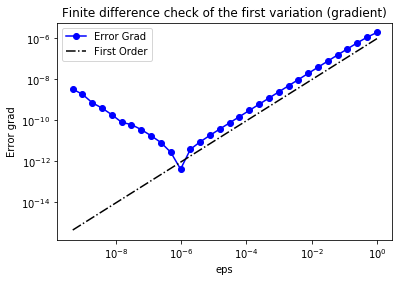

In [11]:
plt.figure()    
plt.loglog(eps, err_grad, "-ob", label="Error Grad")
plt.loglog(eps, (.5*err_grad[0]/eps[0])*eps, "-.k", label="First Order")
plt.title("Finite difference check of the first variation (gradient)")
plt.xlabel("eps")
plt.ylabel("Error grad")
plt.legend(loc = "upper left")
plt.show()

### Initial guess

We solve the state equation and compute the cost functional for the initial guess of the parameter ``m0``

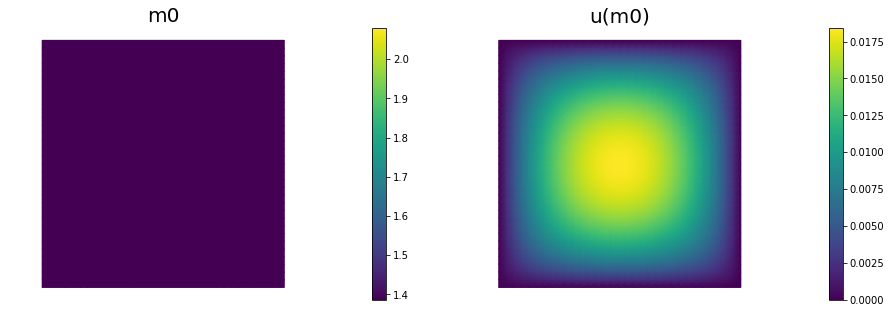

In [12]:
# First, we assign the m_0 = log 4 to the m Function
m.assign(m0)

# Solve state equation
A_state, b_state = dl.assemble_system (a_state, L_state, bc_state)
dl.solve(A_state, u.vector(), b_state)

# Evaluate cost
[cost_old, misfit_old, reg_old] = cost(u, ud, m, gamma)

# Plot using the redefined plots function with the nb library
plt.figure(figsize=(15,5))
nb.plot(m,subplot_loc=121, mytitle="m0", vmin=mtrue.vector().min(), vmax=mtrue.vector().max())
nb.plot(u,subplot_loc=122, mytitle="u(m0)")
plt.show()

## The steepest descent with Armijo line search:

* Its solved the constrained optimization problem using the steepest descent method with Armijo line search.

* The stopping criterion is based on a relative reduction of the norm of the gradient (i.e. $\frac{\|g_{n}\|}{\|g_{0}\|} \leq \tau$).

* The gradient is computed by solving the state and adjoint equation for the current parameter $m$, and then substituing the current state $u$, parameter $m$ and adjoint $p$ variables in the weak form expression of the gradient: 
$$ (g, \tilde{m}) = \gamma(\nabla m, \nabla \tilde{m}) +(\tilde{m}e^m\nabla u, \nabla p).$$

* The Armijo line search uses backtracking to find $\alpha$ such that a sufficient reduction in the cost functional is achieved. Specifically, we use backtracking to find $\alpha$ to guaratee optimal desceent such that:
$$J( m - \alpha g ) \leq J(m) - \alpha c_{\rm armijo} (g,g). $$


N.It Cost          Misfit        Reg         ||grad||       Alpha  N Backtrack
  0   5.89284e-06   5.86316e-06   2.96749e-08   5.82444e-05   2.50000e+04     2


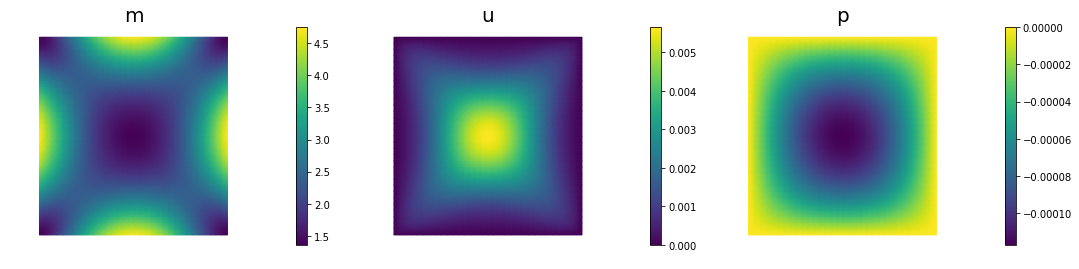

 10   1.38332e-07   1.30701e-07   7.63124e-09   1.60278e-06   5.00000e+04     1
 20   8.20896e-08   7.87804e-08   3.30927e-09   2.74070e-07   5.00000e+04     1
 30   7.99027e-08   7.69390e-08   2.96371e-09   3.29151e-07   5.00000e+04     1
 40   7.75756e-08   7.48371e-08   2.73853e-09   1.38034e-07   5.00000e+04     1
 50   7.67806e-08   7.41939e-08   2.58664e-09   2.07865e-07   2.50000e+04     2


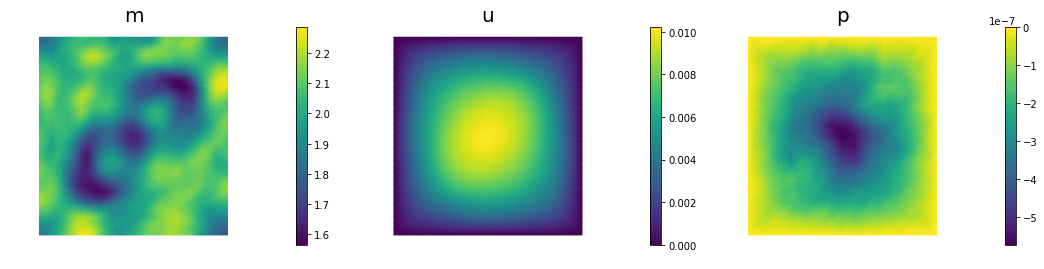

 60   7.64228e-08   7.39684e-08   2.45432e-09   9.40038e-08   5.00000e+04     1
 70   7.60424e-08   7.36714e-08   2.37097e-09   2.51960e-08   1.00000e+05     0
 80   7.59151e-08   7.35864e-08   2.32868e-09   7.35559e-08   5.00000e+04     1
 90   7.57234e-08   7.34217e-08   2.30162e-09   3.77022e-08   5.00000e+04     1
100   7.56778e-08   7.33853e-08   2.29244e-09   6.40944e-08   5.00000e+04     1


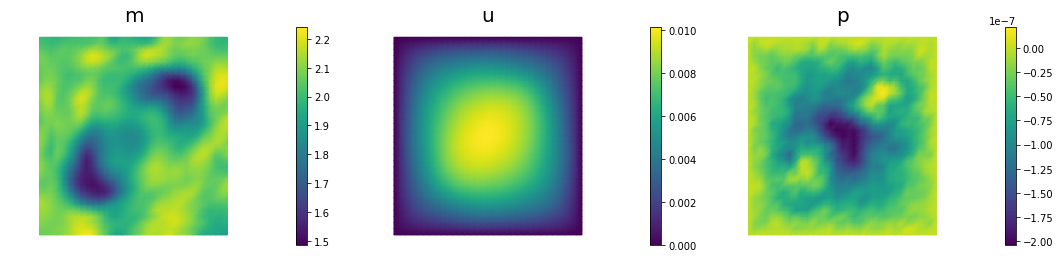

110   7.55705e-08   7.32796e-08   2.29084e-09   3.34102e-08   5.00000e+04     1
120   7.55147e-08   7.32190e-08   2.29567e-09   9.99897e-09   1.00000e+05     0
130   7.54965e-08   7.31937e-08   2.30287e-09   3.15791e-08   5.00000e+04     1
140   7.54642e-08   7.31518e-08   2.31233e-09   1.57229e-08   5.00000e+04     1
150   7.54483e-08   7.31278e-08   2.32046e-09   2.82641e-08   2.50000e+04     2


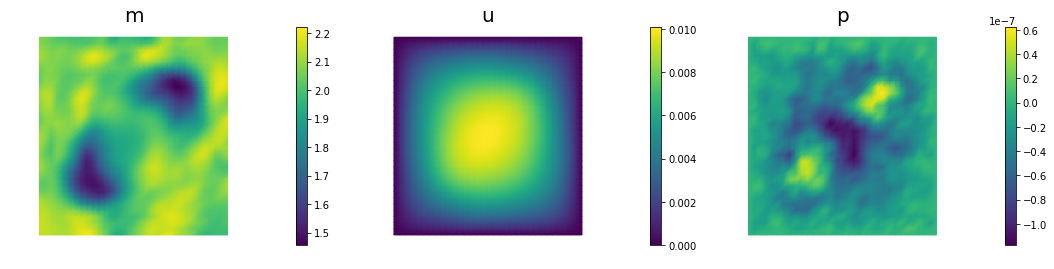

Steepest descent converged in  151   iterations


In [13]:
# Define parameters for the optimization
tol = 1e-4
maxiter = 200
print_any = 10
plot_any = 50
c_armijo = 1e-5

# Initialize iter counters
iter = 0
converged = False

# Initilize direction vector
g = dl.Vector()
# and their correct dimensions 
M.init_vector(g, 0)

m_prev = dl.Function(Vm)

print( "N.It Cost          Misfit        Reg         ||grad||       Alpha  N Backtrack" )

# We'll iterate until a maxiter number and if has not converged
while iter <  maxiter and not converged:

    # Solve the adoint problem
    adj_A, adjoint_RHS = dl.assemble_system(a_adj, L_adj, bc_adj)
    dl.solve(adj_A, p.vector(), adjoint_RHS)

    # Evaluate the  gradient
    MG = dl.assemble(CTvarf + gradRvarf)
    dl.solve(M, g, MG)

    # Calculate the norm of the gradient
    grad_norm2 = g.inner(MG)
    gradnorm = np.sqrt(grad_norm2)
    
    # Start the gradnorm
    if iter == 0:
        gradnorm0 = gradnorm

    # Armijo Linesearch
    it_backtrack = 0
    m_prev.assign(m)
    alpha = 1.E5
    backtrack_converged = False
    for it_backtrack in range(20):
        
        # Generate vector m - alpha*g
        m.vector().axpy(-alpha, g )
        
        # Obtain the J(m-alpha*g) functional by
        # Solving the state/forward problem
        state_A, state_b = dl.assemble_system(a_state, L_state, bc_state)
        dl.solve(state_A, u.vector(), state_b)

        # Then, evaluating at the cost
        [cost_new, misfit_new, reg_new] = cost(u, ud, m, gamma)

        # check if Armijo conditions are satisfied
        if cost_new < cost_old - alpha * c_armijo * grad_norm2:
            cost_old = cost_new
            backtrack_converged = True
            break
        else:
            alpha *= 0.5
            m.assign(m_prev)  # reset a
            
    if backtrack_converged == False:
        print( "Backtracking failed. A sufficient descent direction was not found" )
        converged = False
        break
    
    # Print a lot of info!.
    sp = ""
    if (iter % print_any)== 0 :
        print( "%3d %1s %8.5e %1s %8.5e %1s %8.5e %1s %8.5e %1s %8.5e %1s %3d" % \
            (iter, sp, cost_new, sp, misfit_new, sp, reg_new, sp, \
            gradnorm, sp, alpha, sp, it_backtrack) )

    if (iter % plot_any)== 0 :
        nb.multi1_plot([m,u,p], ["m","u","p"], same_colorbar=False)
        plt.show()
    
    # check for convergence
    if gradnorm < tol*gradnorm0 and iter > 0:
        converged = True
        print ("Steepest descent converged in ",iter,"  iterations")
        
    iter += 1
    
if not converged:
    print ( "Steepest descent did not converge in ", maxiter, " iterations")

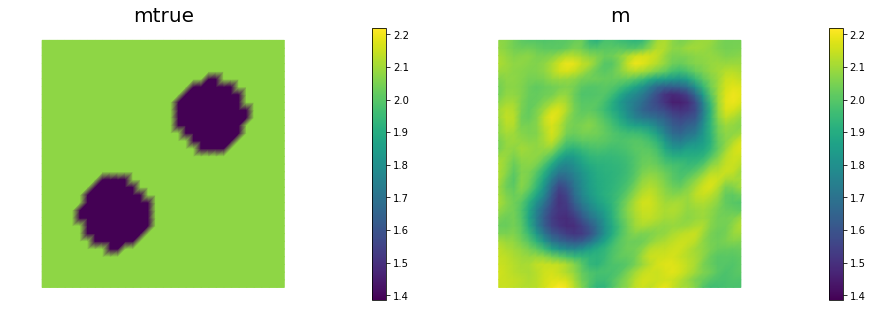

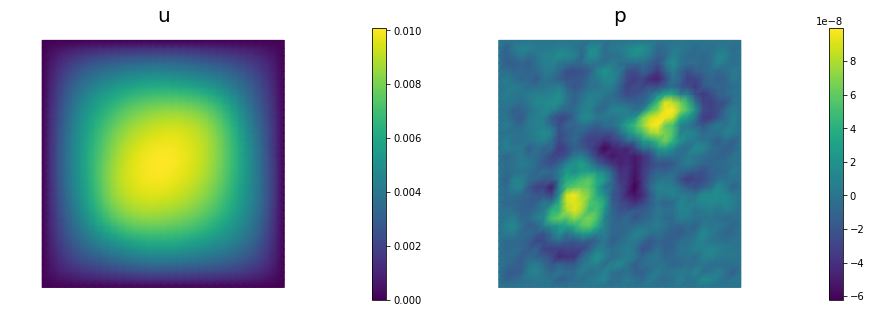

In [14]:
nb.multi1_plot([mtrue, m], ["mtrue", "m"])
nb.multi1_plot([u,p], ["u","p"], same_colorbar=False)
plt.show()

## Hands on!

### Question 1

> Whats the number of steepest descent iterations needed for a discretization of the domain with $16 \times 16$, $32 \times 32$, $64 \times 64$ finite elements? 
  how the number of iterations changes as the inversion parameter mesh is refined?


### Question 2

> Since the coefficient $m$ is discontinuous, a better choice of regularization is total variation rather than Tikhonov regularization, to prevent an overly smooth reconstruction. 
Modify the implementation and plot the result for a reasonably chosen regularization parameter $\gamma$, in the form:

> $$ \mathcal{R}_{\rm TV}^\varepsilon = \gamma \int_\Omega (\nabla m \cdot \nabla m + \varepsilon)^{\frac{1}{2}}\, dx. $$

In [20]:
def AddDiffInverseProblem(nx, ny, v, gamma, useTV=False, TVeps=None, plotting=False):
    np.random.seed(seed=1)
    mesh = dl.UnitSquareMesh(nx, ny)
    Vm = dl.FunctionSpace(mesh, 'Lagrange', 1)
    Vu = dl.FunctionSpace(mesh, 'Lagrange', 2)

    # The true and initial guess for inverted parameter
    # defined using c++ expressions
    cpp = 'std::log(8.-4.*(pow(x[0]-0.3,2) + pow(x[1]-0.3,2) < pow(0.15,2) || \
                           pow(x[0]-0.7,2) + pow(x[1]-0.7,2) < pow(0.15,2) ) )'
    mtrue = dl.interpolate(dl.Expression(cpp, degree=2), Vm)

    # Define function for state and adjoint
    u = dl.Function(Vu)
    m = dl.Function(Vm)
    p = dl.Function(Vu)

    # Define Trial and Test Functions
    u_trial, m_trial, p_trial = dl.TrialFunction(Vu), dl.TrialFunction(Vm), dl.TrialFunction(Vu)
    u_test,  m_test,  p_test  = dl.TestFunction(Vu),  dl.TestFunction(Vm),  dl.TestFunction(Vu)

    # Initialize input functions
    f  = dl.Constant(1.0)
    u0 = dl.Constant(0.0)
    
    # Set up dirichlet boundary conditions
    #def boundary(x,on_boundary):
    #    return on_boundary
    bc_state = dl.DirichletBC(Vu, u0, "on_boundary")
    bc_adj   = dl.DirichletBC(Vu, dl.Constant(0.), "on_boundary")
    
    # noise level
    noise_level = 0.05

    # Weak form for setting up the synthetic observations
    # Its added a diffusion term v
    a_true = dl.inner( dl.exp(mtrue) * dl.grad(u_trial), dl.grad(u_test)) * dl.dx \
            + dl.dot(v, dl.grad(u_trial))*u_test*dl.dx
    L_true = f * u_test * dl.dx

    # Solve the forward/state problem to generate synthetic observations
    A_true, b_true = dl.assemble_system(a_true, L_true, bc_state)

    utrue = dl.Function(Vu)
    dl.solve(A_true, utrue.vector(), b_true)

    ud = dl.Function(Vu)
    ud.assign(utrue)

    # Perturb state solution and create synthetic measurements ud
    # ud = u + ||u||* random.normal
    MAX = ud.vector().norm("linf")
    noise = dl.Vector()
    A_true.init_vector(noise,1)
    noise.set_local( noise_level * MAX * np.random.normal(0, 1, len(ud.vector().get_local())) )
    bc_adj.apply(noise)
    
    ud.vector().axpy(1., noise)

    if plotting:
        nb.multi1_plot([utrue, ud], ["State solution with mtrue", "Synthetic observations"])
        plt.show()
        
    
    # Define cost function
    def cost(u, ud, m, gamma):
        if useTV:
            reg = gamma * dl.assemble( dl.sqrt(dl.inner(dl.grad(m), dl.grad(m)) + TVeps)*dl.dx ) 
        else:
            reg = 0.5* gamma * dl.assemble( dl.inner(dl.grad(m), dl.grad(m))*dl.dx )
            
        misfit = 0.5 * dl.assemble( (u-ud)**2*dl.dx)
        return [reg + misfit, misfit, reg]
    
    # Weak form for setting up the state equation
    # Adding a diffusion term
    a_state = dl.inner( dl.exp(m) * dl.grad(u_trial), dl.grad(u_test)) * dl.dx \
              + dl.dot(v, dl.grad(u_trial))*u_test*dl.dx
    L_state = f * u_test * dl.dx

    # Weak form for setting up the adjoint equations
    # with the diffusion term
    a_adj = dl.inner( dl.exp(m) * dl.grad(p_trial), dl.grad(p_test) ) * dl.dx \
            + dl.dot(v, dl.grad(p_test))*p_trial*dl.dx
    L_adj = - dl.inner(u - ud, p_test) * dl.dx

    # Weak form for gradient
    CTvarf    = dl.inner(dl.exp(m)*m_test*dl.grad(u), dl.grad(p)) * dl.dx
    if useTV:
        gradRvarf = ( dl.Constant(gamma)/dl.sqrt(dl.inner(dl.grad(m), dl.grad(m)) + TVeps) )* \
                     dl.inner(dl.grad(m), dl.grad(m_test))*dl.dx
    else:
        gradRvarf = dl.Constant(gamma)*dl.inner(dl.grad(m), dl.grad(m_test))*dl.dx

    # Mass matrix in parameter space
    Mvarf    = dl.inner(m_trial, m_test) * dl.dx
    M = dl.assemble(Mvarf)
    
    m0 = dl.interpolate(dl.Constant(np.log(4.) ), Vm )
    
    m.assign(m0)

    # solve state equation
    A, state_b = dl.assemble_system (a_state, L_state, bc_state)
    dl.solve(A, u.vector(), state_b)

    # evaluate cost
    [cost_old, misfit_old, reg_old] = cost(u, ud, m, gamma)

    if plotting:
        plt.figure(figsize=(15,5))
        nb.plot(m,subplot_loc=121, mytitle="m0", vmin=mtrue.vector().min(), vmax=mtrue.vector().max())
        nb.plot(u,subplot_loc=122, mytitle="u(m0)")
        plt.show()

    tol = 1e-4
    maxiter = 1000
    c_armijo = 1e-5

    # initialize iter counters
    iter = 0
    converged = False

    # initializations
    g = dl.Vector()
    M.init_vector(g,0)

    m_prev = dl.Function(Vm)

    while iter <  maxiter and not converged:

        # solve the adjoint problem
        adj_A, adjoint_RHS = dl.assemble_system(a_adj, L_adj, bc_adj)
        dl.solve(adj_A, p.vector(), adjoint_RHS)

        # evaluate the  gradient
        MG = dl.assemble(CTvarf + gradRvarf)
        dl.solve(M, g, MG)

        # calculate the norm of the gradient
        grad_norm2 = g.inner(MG)
        gradnorm = np.sqrt(grad_norm2)
    
        if iter == 0:
            gradnorm0 = gradnorm

        # linesearch
        it_backtrack = 0
        m_prev.assign(m)
        alpha = 1.e5
        backtrack_converged = False
        for it_backtrack in range(20):
        
            m.vector().axpy(-alpha, g )

            # solve the state/forward problem
            state_A, state_b = dl.assemble_system(a_state, L_state, bc_state)
            dl.solve(state_A, u.vector(), state_b)

            # evaluate cost
            [cost_new, misfit_new, reg_new] = cost(u, ud, m, gamma)

            # check if Armijo conditions are satisfied
            if cost_new < cost_old - alpha * c_armijo * grad_norm2:
                cost_old = cost_new
                backtrack_converged = True
                break
            else:
                alpha *= 0.5
                m.assign(m_prev)  # reset a
            
        if backtrack_converged == False:
            print( "Backtracking failed. A sufficient descent direction was not found" )
            converged = False
            break
    
        # check for convergence
        if gradnorm < tol*gradnorm0 and iter > 0:
            converged = True
            print ("Steepest descent converged in ",iter,"  iterations")
        
        iter += 1
    
    if not converged:
        print ( "Steepest descent did not converge in ", maxiter, " iterations")
        
    if plotting:
        nb.multi1_plot([mtrue, m], ["mtrue", "m"])
        nb.multi1_plot([u,p], ["u","p"], same_colorbar=False)
        plt.show()
    
    Mstate = dl.assemble(u_trial*u_test*dl.dx)
    noise_norm2 = noise.inner(Mstate*noise)
    return Vm.dim(), iter, noise_norm2, cost_new, misfit_new, reg_new

--- Instant: compiling ---


Steepest descent converged in  219   iterations
Steepest descent converged in  137   iterations


Text(0,0.5,'Number of iterations')

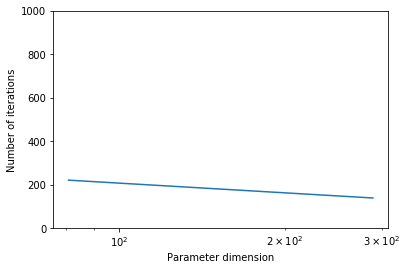

In [21]:
## Question 1
ns = [8, 16] # 32, 64
niters = []
ndofs  = []

for n in ns:
    ndof, niter, _,_,_,_ = AddDiffInverseProblem(nx=n, ny=n, v=dl.Constant((0., 0.)),
                                         gamma = 1e-9, useTV=False, plotting=False)
    niters.append(niter)
    ndofs.append(ndof)
    
plt.semilogx(ndofs, niters)
plt.ylim([0, 1000])
plt.xlabel("Parameter dimension")
plt.ylabel("Number of iterations")

Solve for gamma =  1e-08


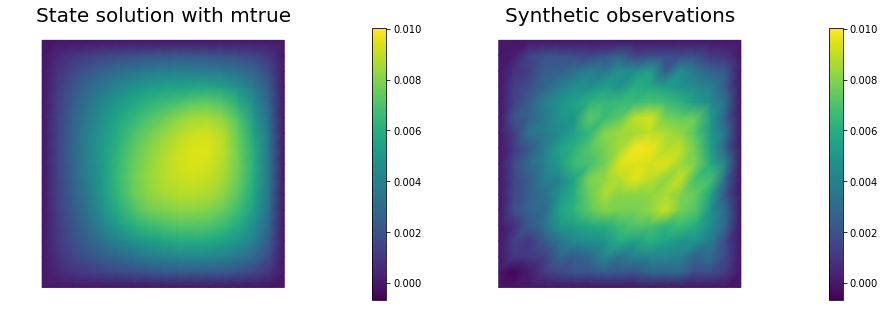

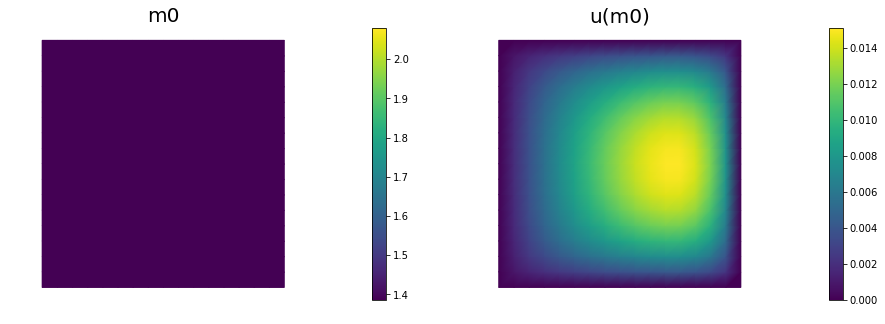

Steepest descent converged in  338   iterations


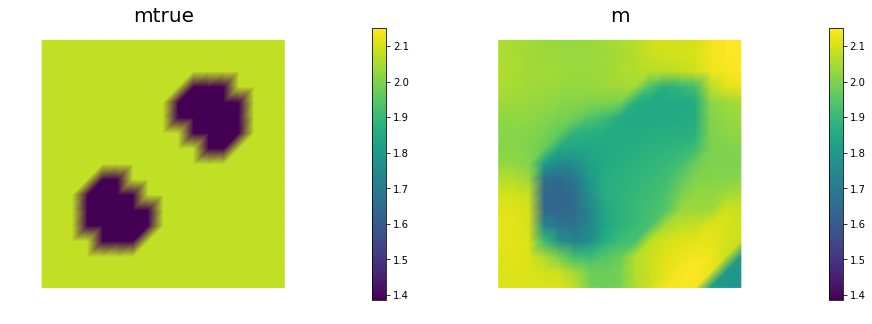

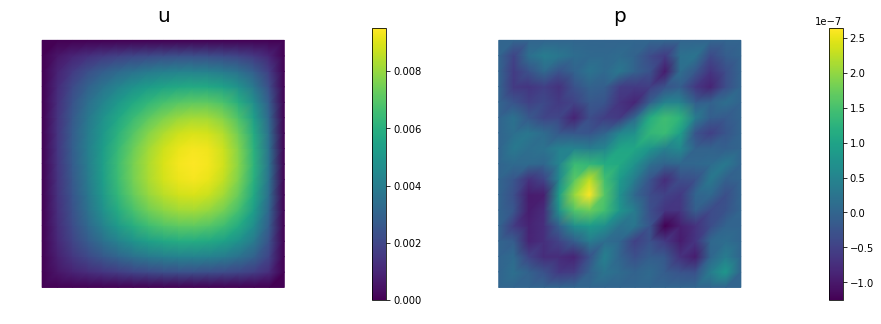

In [24]:
## Question 2
n = 16
gammas = [1e-7, 1e-8, 1e-9, 1e-10]
misfits = []

for gamma in gammas:
    ndof, niter, noise_norm2, cost,misfit,reg = AddDiffInverseProblem(nx=n, ny=n, v=dl.Constant((30., 0.)),
                                         gamma = gamma, useTV=True, TVeps=dl.Constant(0.1), plotting=False)
    misfits.append(misfit)
    
plt.loglog(gammas, misfits, "-*b", label="Misfit")
plt.loglog([gammas[0],gammas[-1]], [.5*noise_norm2, .5*noise_norm2], "-r", label="Squared norm noise")
plt.title("Morozov discrepancy principle")
plt.xlabel("Regularization parameter")
plt.ylabel("Misfit cost")
plt.show()

#print("Solve for gamma = ", 1e-8)
#_ = AddDiffInverseProblem(nx=n, ny=n, v=dl.Constant((30., 0.)), gamma = 1e-8, useTV=True,
#                      TVeps=dl.Constant(0.1), plotting=True)

In [26]:
gammas = [1e-7, 1e-8]# 1e-9, 1e-10
misfits = []

for gamma in gammas:
    ndof, niter, noise_norm2, cost,misfit,reg = AddDiffInverseProblem(nx=n, ny=n, v=dl.Constant((30., 0.)),
                                         gamma = gamma, useTV=True, TVeps=dl.Constant(0.1), plotting=False)
    misfits.append(misfit)
    

Steepest descent converged in  897   iterations
Steepest descent converged in  338   iterations


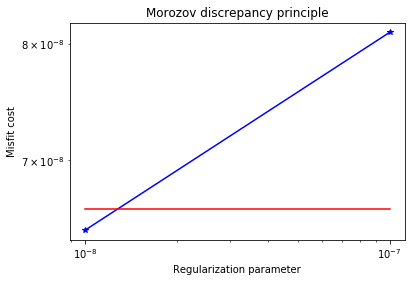

In [28]:
plt.loglog(gammas, misfits, "-*b", label="Misfit")
plt.loglog([gammas[0],gammas[-1]], [.5*noise_norm2, .5*noise_norm2], "-r", label="Squared norm noise")
plt.title("Morozov discrepancy principle")
plt.xlabel("Regularization parameter")
plt.ylabel("Misfit cost")
plt.show()